# Curso: Bioestatística — Experimento de Regressão Polinomial
## Autores: Sandro da Silva Camargo e Fernando Cardoso

**Problema**:Um experimento foi realizado para testar o efeito
de adubação em milho no qual os tratamentos foram as doses de 25, 50, 75 e 100 kg/ha de P2 O5 além de uma testemunha que não recebeu a adubação fosfatada.
A variável resposta é a produção de grãos.

A base de dados está disponível [aqui](https://github.com/Sandrocamargo/biostatistics/blob/master/datasets/rl-adubo.txt).

Abra este código no seu google colab [clicando aqui](https://colab.research.google.com/github/Sandrocamargo/biostatistics/blob/master/python/bioe_06_Regressao_Linear_Multipla.ipynb).

# Importação de Pacotes

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Carga e inspeção de dados

In [11]:
# === 1. Leitura dos dados ===
dados = pd.read_csv("https://raw.githubusercontent.com/Sandrocamargo/biostatistics/refs/heads/master/datasets/rl-adubo.txt", sep="\t", header=0)
dados.info()
dados.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   trat    20 non-null     int64  
 1   rep     20 non-null     int64  
 2   y       20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 612.0 bytes


,trat,rep,y
0,0,1,8.38
1,0,2,5.77
2,0,3,4.90
3,0,4,4.54
4,25,1,7.15


# Análise de variância

=== ANOVA usual (trat_f como fator) ===
            sum_sq    df         F   PR(>F)
trat_f    40.09975   4.0  7.166181  0.00196
Residual  20.98385  15.0       NaN      NaN


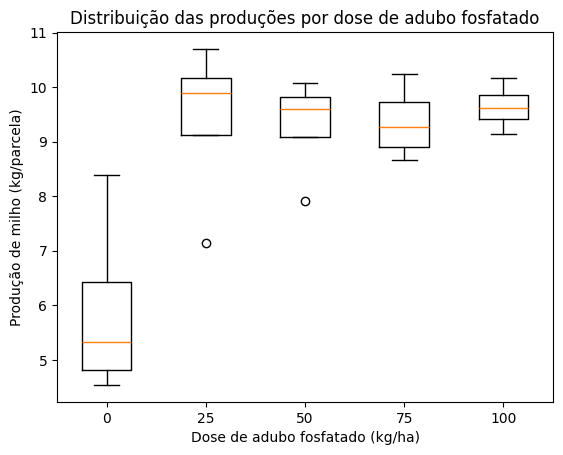

In [3]:
# === 2. ANOVA usual (tratamento como fator) ===
dados["trat_f"] = dados["trat"].astype("category")
modelo_anova = smf.ols("y ~ trat_f", data=dados).fit()
anova_geral = sm.stats.anova_lm(modelo_anova, typ=2)
print("=== ANOVA usual (trat_f como fator) ===")
print(anova_geral)

# Boxplot
plt.figure()
plt.boxplot([dados.loc[dados["trat_f"] == t, "y"] for t in dados["trat_f"].cat.categories],
            tick_labels=dados["trat_f"].cat.categories)
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title("Distribuição das produções por dose de adubo fosfatado")
plt.savefig("regr-boxplot.pdf")
plt.show()

In [4]:
# === 3. Criação dos novos dados (para as curvas de ajuste) ===
novosdados = pd.DataFrame({"trat": np.linspace(dados["trat"].min(),
                                               dados["trat"].max(), 100)})


=== Modelo Linear (1º grau) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.22
Date:                Tue, 21 Oct 2025   Prob (F-statistic):            0.00499
Time:                        18:46:20   Log-Likelihood:                -35.046
No. Observations:                  20   AIC:                             74.09
Df Residuals:                      18   BIC:                             76.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.23

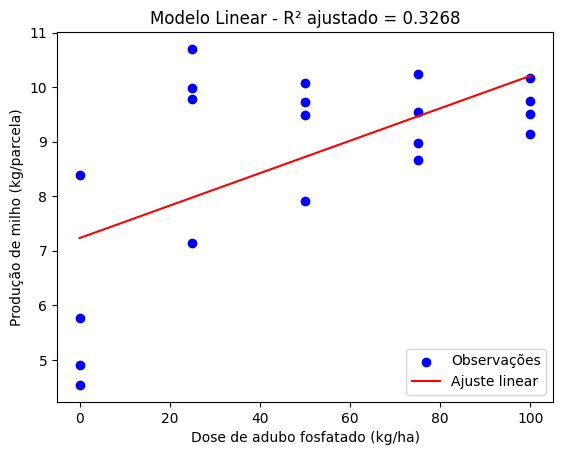

In [5]:
# === 4. Modelo linear (1º grau) ===
mp_1 = smf.ols("y ~ trat", data=dados).fit()
print("\n=== Modelo Linear (1º grau) ===")
print(mp_1.summary())

plt.figure()
plt.scatter(dados["trat"], dados["y"], label="Observações", color="blue")
plt.plot(novosdados["trat"], mp_1.predict(novosdados), color="red", label="Ajuste linear")
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title(f"Modelo Linear - R² ajustado = {mp_1.rsquared_adj:.4f}")
plt.legend()
plt.savefig("regr-grau1.pdf")
plt.show()


=== Modelo Quadrático (2º grau) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     10.27
Date:                Tue, 21 Oct 2025   Prob (F-statistic):            0.00119
Time:                        18:46:21   Log-Likelihood:                -31.622
No. Observations:                  20   AIC:                             69.24
Df Residuals:                      17   BIC:                             72.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept  

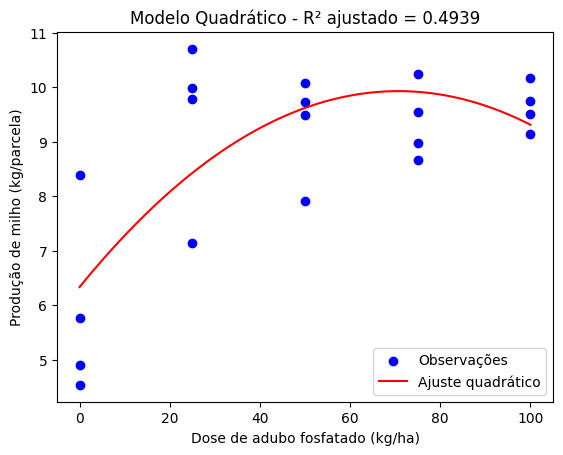

In [6]:
# === 5. Modelo quadrático (2º grau) ===
mp_2 = smf.ols("y ~ trat + I(trat**2)", data=dados).fit()
print("\n=== Modelo Quadrático (2º grau) ===")
print(mp_2.summary())

plt.figure()
plt.scatter(dados["trat"], dados["y"], label="Observações", color="blue")
plt.plot(novosdados["trat"], mp_2.predict(novosdados), color="red", label="Ajuste quadrático")
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title(f"Modelo Quadrático - R² ajustado = {mp_2.rsquared_adj:.4f}")
plt.legend()
plt.savefig("regr-grau2.pdf")
plt.show()


=== Modelo Cúbico (3º grau) ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     9.630
Date:                Tue, 21 Oct 2025   Prob (F-statistic):           0.000718
Time:                        18:46:22   Log-Likelihood:                -29.227
No. Observations:                  20   AIC:                             66.45
Df Residuals:                      16   BIC:                             70.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      

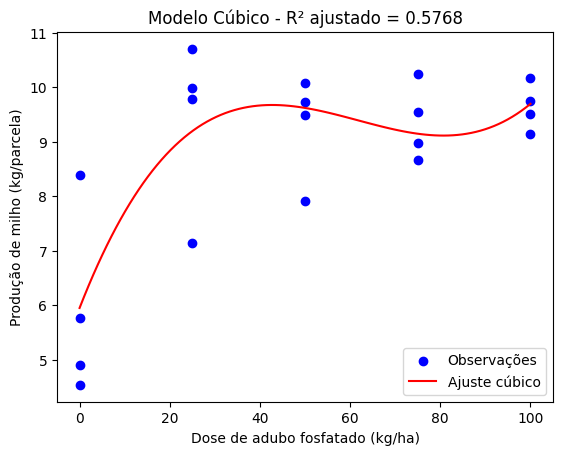

In [7]:
# === 6. Modelo cúbico (3º grau) ===
mp_3 = smf.ols("y ~ trat + I(trat**2) + I(trat**3)", data=dados).fit()
print("\n=== Modelo Cúbico (3º grau) ===")
print(mp_3.summary())

plt.figure()
plt.scatter(dados["trat"], dados["y"], label="Observações", color="blue")
plt.plot(novosdados["trat"], mp_3.predict(novosdados), color="red", label="Ajuste cúbico")
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title(f"Modelo Cúbico - R² ajustado = {mp_3.rsquared_adj:.4f}")
plt.legend()
plt.savefig("regr-grau3.pdf")
plt.show()


=== Modelo de 4º grau ===
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     7.166
Date:                Tue, 21 Oct 2025   Prob (F-statistic):            0.00196
Time:                        18:46:23   Log-Likelihood:                -28.859
No. Observations:                  20   AIC:                             67.72
Df Residuals:                      15   BIC:                             72.70
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.89

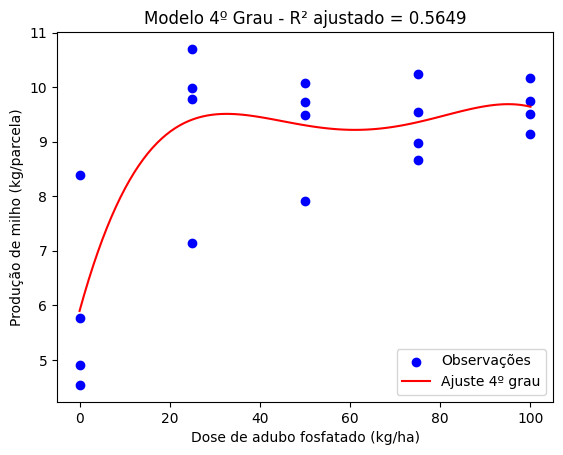

In [8]:
# === 7. Modelo de 4º grau ===
mp_4 = smf.ols("y ~ trat + I(trat**2) + I(trat**3) + I(trat**4)", data=dados).fit()
print("\n=== Modelo de 4º grau ===")
print(mp_4.summary())

plt.figure()
plt.scatter(dados["trat"], dados["y"], label="Observações", color="blue")
plt.plot(novosdados["trat"], mp_4.predict(novosdados), color="red", label="Ajuste 4º grau")
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.title(f"Modelo 4º Grau - R² ajustado = {mp_4.rsquared_adj:.4f}")
plt.legend()
plt.savefig("regr-grau4.pdf")
plt.show()

In [9]:
# === 8. Comparação entre modelos por ANOVA ===
print("\n=== Comparação entre modelos (anova) ===")
anova_comp = sm.stats.anova_lm(mp_1, mp_2, mp_3, mp_4)
print(anova_comp)


=== Comparação entre modelos (anova) ===
   df_resid        ssr  df_diff    ss_diff         F    Pr(>F)
0      18.0  38.957037      0.0        NaN       NaN       NaN
1      17.0  27.661993      1.0  11.295045  8.074098  0.011275
2      16.0  21.771430      1.0   5.890562  4.210783  0.056905
3      15.0  20.983850      1.0   0.787580  0.562990  0.464666


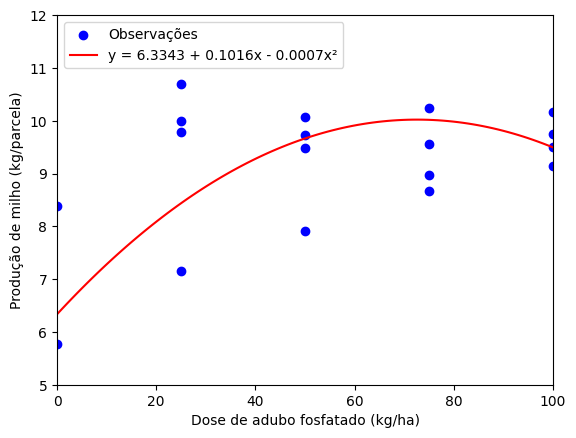

In [10]:
# === 9. Gráfico final com modelo quadrático ajustado ===
plt.figure()
plt.scatter(dados["trat"], dados["y"], color="blue", label="Observações")
x = np.linspace(0, 100, 100)
y_pred = 6.3343 + 0.1016*x - 0.0007*x**2
plt.plot(x, y_pred, color="red", label="y = 6.3343 + 0.1016x - 0.0007x²")
plt.xlabel("Dose de adubo fosfatado (kg/ha)")
plt.ylabel("Produção de milho (kg/parcela)")
plt.xlim(0, 100)
plt.ylim(5, 12)
plt.legend(loc="upper left")
plt.savefig("lm-curva.pdf")
plt.show()